# Section 1: $f(\mathbf{x}) = \mathbf{Ax} - \mathbf{b}$

In [207]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2,1,3],[2,6,8],[6,8,18]]).astype(np.float32) # 3 x 3
b = np.array([[1],[3],[5]]).astype(np.float32) # 3 x 1

x = np.random.uniform(-1.0,1.0,size=(3,1)) # 3 x 1
x_memo = np.copy(x)

# Solution
y = np.dot(np.linalg.inv(A), b)

def F(x):
  return np.dot(A,x) - b


# definition of loss function (MSE of F(x))
def L(x):
  delta = F(x) - y
  return (np.dot(delta.T, delta) / (2 * y.shape[0])).flatten().item()


# definition of gradient
def g(x):
  return np.dot(A.T, F(x))

In [208]:
EPSILON = 1e-4
MAX_ITERATIONS = 1000

def update(x, delta_theta):
  x += delta_theta

def get_accuracy(x):
  prediction = F(x)

  # no accuracy for regression problem
  if len(prediction) == 1:
    return -1

  prediction = np.argmax(prediction, axis=1)
  label = np.argmax(y, axis=1)
  accuracy = np.divide(np.sum(prediction==label), label.shape[0])
  return np.around(accuracy, decimals=3)

In [209]:
def GD(x, alpha, verbose=False):
  """Implementation of gradient descent loop."""
  i = 0
  history = []
  accuracy = []
  while True:
    update(x, -alpha * g(x))
    loss = L(x)
    history.append(loss)
    accuracy.append(get_accuracy(x))
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break

  return x, history, accuracy

In [210]:
def Momentum(x, alpha, beta=0.9, verbose=False):
  i = 0
  history = []
  accuracy = []
  prev_vT = 0
  while True:
    vT = beta * prev_vT + (1 - beta) * g(x)
    update(x, -alpha * vT)
    loss = L(x)
    history.append(loss)
    accuracy.append(get_accuracy(x))
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break
    prev_vT = vT

  return x, history, accuracy

In [211]:
def Adadelta(x, beta=0.95, verbose=False):
  epsilon = 1e-6
  expected_g_square = 0
  expected_delta_theta_square = 0
  rms_theta = 0
  i = 0
  history = []
  accuracy = []

  while True:
    gradient = g(x)
    expected_g_square = (beta * expected_g_square) + (1 - beta) *  np.square(gradient)

    delta_theta = -(np.sqrt(expected_delta_theta_square + epsilon) / \
                   np.sqrt(expected_g_square + epsilon)) * gradient
    update(x, delta_theta)

    loss = L(x)
    history.append(loss)
    accuracy.append(get_accuracy(x))
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break
    
    expected_delta_theta_square = (beta * expected_delta_theta_square) + \
        (1 - beta) * np.square(delta_theta)

  return x, history, accuracy

In [212]:
def Adam(x, alpha, beta1=0.9, beta2=0.999, verbose=False):
  epsilon = 1e-8
  m_t = 0
  v_t = 0
  i = 0
  history = []
  accuracy = []

  while True:
    t = i + 1
    gradient = g(x)
    m_t = beta1 * m_t + (1 - beta1) * gradient
    v_t = beta2 * v_t + (1 - beta2) * np.square(gradient)

    m_t_hat = m_t / (1 - beta1 ** t)
    v_t_hat = v_t / (1 - beta2 ** t)
    
    update(x, -alpha * m_t_hat / (np.sqrt(v_t_hat) + epsilon))

    loss = L(x)
    history.append(loss)
    accuracy.append(get_accuracy(x))
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break

  return x, history, accuracy

In [213]:
def AdamWithWarmup(x, alpha, beta1=0.9, beta2=0.999, warmup_steps=1000, verbose=False):
  epsilon = 1e-8
  m_t = 0
  v_t = 0
  i = 0
  history = []
  accuracy = []

  while True:
    t = i + 1
    warmup_rate = t / warmup_steps
    learning_rate = alpha * min(1, warmup_rate)
    
    gradient = g(x)
    m_t = beta1 * m_t + (1 - beta1) * gradient
    v_t = beta2 * v_t + (1 - beta2) * np.square(gradient)

    m_t_hat = m_t / (1 - beta1 ** t)
    v_t_hat = v_t / (1 - beta2 ** t)
    
    update(x, -learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon))

    loss = L(x)
    history.append(loss)
    accuracy.append(get_accuracy(x))
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break

  return x, history, accuracy

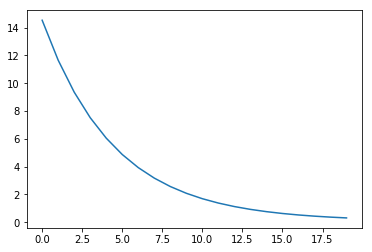

In [47]:
x = np.copy(x_memo)
x, history, _ = GD(x, alpha=0.0002, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

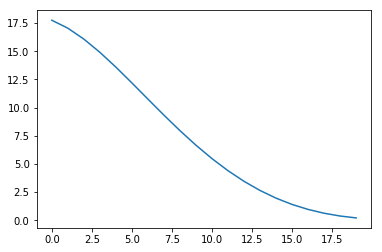

In [48]:
x = np.copy(x_memo)
x, history, _ = Momentum(x, alpha=0.0002, beta=0.9, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

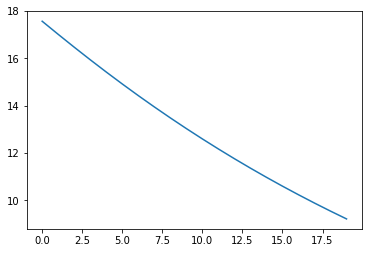

In [49]:
x = np.copy(x_memo)
x, history, _ = Adadelta(x, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

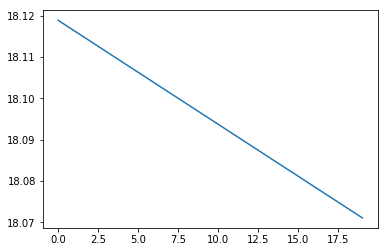

In [50]:
x = np.copy(x_memo)
x, history, _ = Adam(x, alpha=2e-5, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

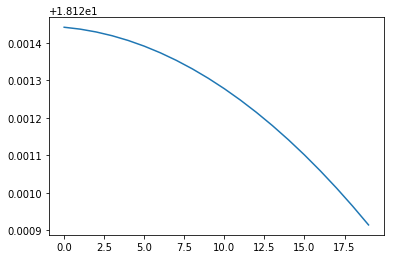

In [51]:
x = np.copy(x_memo)
x, history, _ = AdamWithWarmup(x, alpha=2e-5, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

# Section 2: $f(\mathbf{x}) = (1-x_{0})^2 + 100 \times (x_{1} - (x_{0})^2)^2 $

In [52]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-1.0,1.0,size=(2,1))
x_memo = np.copy(x)
y = 0

def F(x):
  return np.power(1-x[0],2) + 100.0*np.power(x[1] - np.power(x[0],2),2)


# definition of loss function (MSE of F(x))
def L(x):
  delta = F(x) - y
  return (np.square(delta) / (2 * x.shape[0])).flatten().item()


# definition of gradient
def g(x):
  return np.array([
    -2*(1-x[0]) - 100.0*4*x[0]*(x[1] - np.power(x[0],2)),
    100.0*2*(x[1] - np.power(x[0],2))
  ])

In [53]:
EPSILON = 1e-7

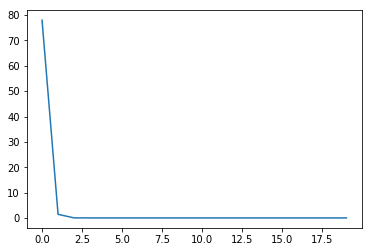

In [60]:
x = np.copy(x_memo)
x, history, _ = GD(x, 0.002, False)
plt.cla()
plt.plot(history)
plt.show()

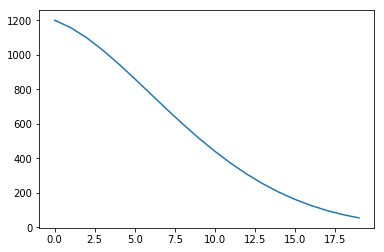

In [61]:
x = np.copy(x_memo)
x, history, _ = Momentum(x, alpha=0.0002, beta=0.9, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

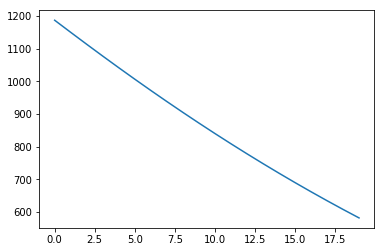

In [62]:
x = np.copy(x_memo)
x, history, _ = Adadelta(x, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

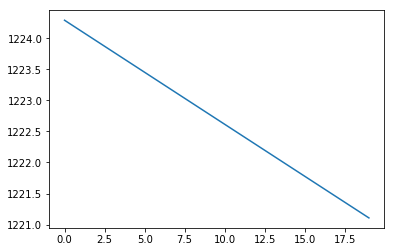

In [63]:
x = np.copy(x_memo)
x, history, _ = Adam(x, alpha=2e-5, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

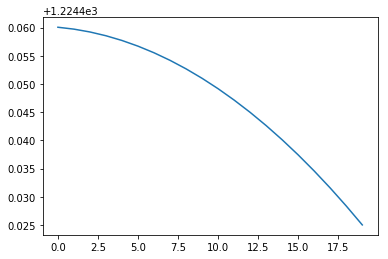

In [64]:
x = np.copy(x_memo)
x, history, _ = AdamWithWarmup(x, alpha=2e-5, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

# Section 3: optimizers in neural network 

- Previous neural network

In [233]:
class NN:
  def initialize_weights(shapes, outputs):
    """Initializes weights of model according to shape.

        Args:
          shapes = [784, 300, 10]
          outputs = ["relu", "sigmoid"]
        returns:
          model with uniform random weights [-1,+1], zero bias and output function
          [
          [random(784, 300), zeros(300), "relu"]
          [random(300, 10), zeros(10), "sigmoid"] 
        ]
    """
    models = []
    for i in range(len(shapes)):
      if i is 0:
        continue

      models.append([
        np.random.uniform(-1, 1, (shapes[i - 1], shapes[i])),
        np.zeros(shapes[i]).reshape(1, shapes[i]),
        outputs[i - 1]
      ])

    return models
    
  def relu(x):
    """Computes relu of function."""
    return np.maximum(0, x)

  def sigmoid(x):
    """Computes sigmoid of function."""
    return 1 / np.maximum(1 + np.exp(-x), 1e-8)

  def relu_derivative(z):
    """Computes derivative of relu of function."""
    z_copy = np.array(z, copy=True)
    z_copy[z_copy <= 0] = 0
    z_copy[z_copy > 0] = 1
    return z_copy

  def sigmoid_derivative(z):
    """Computes derivative of sigmoid of function."""
    sig = sigmoid(z)
    return sig * (1 - sig)
      
  def activate(z, funcName):
    """Activate the given input based on activation function name
    
      Args:
        z: input tensor of shape (B, Ni)
        funcName: string of supported activation function name
      Returns:
        tensor of shape (B, Ni) after applied activation function
    """
    supported_funcs = {
      "relu": NN.relu,
      "sigmoid": NN.sigmoid,
      "linear": lambda x: x
    }

    if funcName not in supported_funcs:
      raise Exception("Unsupported function")

    return supported_funcs[funcName](z)
    
  def forward(x, model):
    """Performs forward pass of training step.

      Args:
        x: input tensor of shape (B, Ni)
        model: list of model weights (see initialize weights)
      Returns:
        List containing dictionary { "y": y, "z": z } for each layer of network.
    """     

    # Add input as first layer, which will be consumed in backward
    layer_output = [{"z": x, "y": x}]

    for w, b, activation_func in model:
      y_prev = layer_output[-1]["y"]
      
      z = np.dot(y_prev, w) + b
      y = NN.activate(z, activation_func)
      
      layer_output.append({"z": z, "y": y})

    return layer_output
    
  def predict(x, model):
    """Predicts the output of a model.

      Args:
        x: input tensor of shape (B, Ni)
        model: list of model weights (see initialize weights)
      Returns:
        Prediction of model, with the same shape as the labeled data (B, No).
    """
    fwd = forward(x, model)
    return fwd[-1]["y"]
    
  def mse(y, p):
    """Computes Mean-Square Error between y and p.
      Args:
        y: labeled data of size (B, No) 
        p: predicted label of size (B, No)
      Returns:
        MSE of y-p
    """
    return np.mean(np.square(y-p))

  def mse_derivative(y, p):
    """Computes derivative of Mean-Square Error between y and p.
      Args:
        y: labeled data of size (B, No) 
        p: predicted label of size (B, No)
      Returns:
        derivative of MSE = y-p
    """
    return p-y
    
  def binary_crossentropy(y, p):
    """Computes binary crossentropy between y and p.
      Args:
        y: labeled data of size (B, No) 
        p: predicted label of size (B, No)
      Returns:
        BCE of (y, p) = mean(sum(y log(p) + (1-y) log(1-p))) 
    """
    
    return -np.mean(y * np.ma.log(p) + (1-y) * np.ma.log(1-p))

  def binary_crossentropy_derivative(y, p):
    """Computes derivative of binary crossentropy between y and p.
      Args:
        y: labeled data of size (B, No) 
        p: predicted label of size (B, No)
      Returns:
        derivative of BCE of (y, p) = -[y / p - (1-y) / (1-p)]
    """
    return -((y / p) - np.divide(1-y, 1-p))
    
  def get_cost(y, p, funcName, is_last_layer_error=False):
    """Calculate lost based on cost function name.
    
      Args:
        y: input tensor of shape (B, Ni)
        p: label vector of shape (B, 1)
        funcName: string of supported lost function name
      Returns:
        tensor of shape (B, Ni) after applied cost function
    """
    supported_cost_funcs = {
      "mse": NN.mse,
      "binary_crossentropy": NN.binary_crossentropy,
    }
      
    supported_cost_funcs_derivative = {
      "mse": NN.mse_derivative,
      "binary_crossentropy": NN.binary_crossentropy_derivative,
    }

    # Should also appear in supported_cost_funcs_derivative 
    if funcName not in supported_cost_funcs:
      raise Exception("Unsupported function")

    func = supported_cost_funcs_derivative if is_last_layer_error else supported_cost_funcs

    return func[funcName](y, p)

  def get_activation_derivative(z, funcName):
    """Computes derivative of activation function for computing dZ.
      Args:
        z: input tensor of shape (B, Ni)
        funcName: string of supported activation function name
      Returns:
        derivative of activation function
    """
    supported_funcs = {
      "relu": NN.relu_derivative,
      "sigmoid": NN.sigmoid_derivative,
      "linear": lambda _: 1
    }

    if funcName not in supported_funcs:
      raise Exception("Unsupported function")

    return supported_funcs[funcName](z)

  def backward(y, x, models, loss):
    """Computes backward step of training.
      Args:
        y: labeled data of size (B, No) 
        x: input tensor of shape (B, Ni)
        model: list of model weights (see initialize weights)
        loss: one of ("mse", "binary_crossentropy")
      Returns:
        tuple with loss evaluation of (y, predict(x)) and list of dictionary
        containing { "dw": dw, "db": db } for each layer of network. Remember
        that shape of dw for each layer should be equal to shape of weight for
        the same layer.
    """
    y_predicted = x[-1]["y"]
    y = y.reshape(y_predicted.shape)
    b = y.shape[0] # number of training data

    cost = NN.get_cost(y, y_predicted, loss)
    weights = []

    dY_prev = NN.get_cost(y, y_predicted, loss, is_last_layer_error=True)

    for i, model in reversed(list(enumerate(models))):
      dY_curr = dY_prev

      Y_prev = x[i]["y"]
      Z_curr = x[i + 1]["z"]
      W_curr, _, activation_func = model
      
      dZ_curr = get_activation_derivative(Z_curr, activation_func) * dY_curr
      dW_curr = np.dot(Y_prev.T, dZ_curr) / b
      db_curr = np.sum(dZ_curr, axis=0, keepdims=True) / b
      dY_prev = np.dot(dZ_curr, W_curr.T)

      weights.insert(0, {"dw": dW_curr, "db": db_curr})

    return (cost, weights)
    
  def update(weights, dweights, alpha):
    """Gradient descent for weights and biases."""
    for i in range(len(weights)):
      weights[i][0] += - alpha * dweights[i]["dw"]
      weights[i][1] += - alpha * dweights[i]["db"]

- New Trainings using mnist and previous neural network

In [215]:
import numpy as np

from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.preprocessing import normalize

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784).astype(np.float32)
x_test = x_test.reshape(x_test.shape[0], 784).astype(np.float32)

y_train = to_categorical(y_train, 10).astype(np.float32)
y_test = to_categorical(y_test, 10).astype(np.float32)

x_train = normalize(x_train, norm='max', axis=0)
x_test = normalize(x_test, norm='max', axis=0)

In [216]:
# create a network using the network you created before (with sigmoid as output layer)
# and train your network here using SGD, Momentum, Adadelta, Adam and
# AdamWithWarmup

outputs = ["sigmoid"]
shapes = [x_train.shape[1], y_train.shape[1]]

model = NN.initialize_weights(shapes, outputs)
model_memo = np.copy(model)

labels = np.argmax(y_train, axis=1)

fwd_results = NN.forward(x_train, model)
y_predicted = fwd_results[-1]["y"]
y = y_train.reshape(y_predicted.shape)


def F(model):
  yy = NN.forward(x_train, model)
  return yy[-1]["y"]

# definition of loss function
def L(model):
  return NN.get_cost(y, F(model), "binary_crossentropy")

# definition of gradient
def g(model):
  return F(model) - y

def update(model, delta_theta):
  for i in range(len(model)):
    model[i][0] += delta_theta[i]

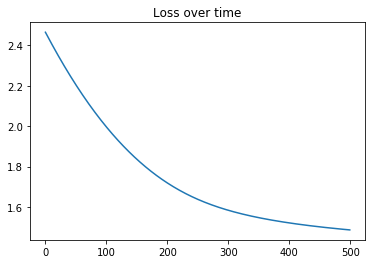

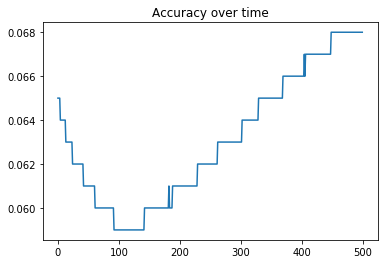

In [177]:
# Plot accuracy and loss as a function of the number of iterations for each
# optimization function above.

model = np.copy(model_memo)
model, history, accuracy = GD(model, alpha=0.0002, verbose=False)
plt.cla()
plt.title('Loss over time')
plt.plot(history)
plt.show()
plt.title('Accuracy over time')
plt.plot(accuracy)
plt.show()

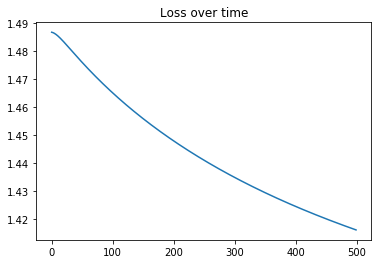

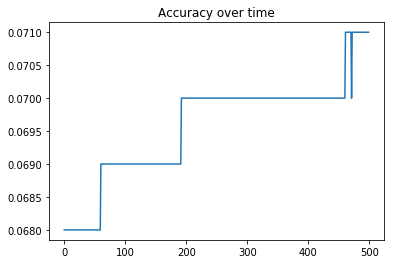

In [178]:
model = np.copy(model_memo)
model, history, accuracy = Momentum(model, alpha=0.0002, beta=0.9, verbose=False)
plt.cla()
plt.title('Loss over time')
plt.plot(history)
plt.show()
plt.title('Accuracy over time')
plt.plot(accuracy)
plt.show()

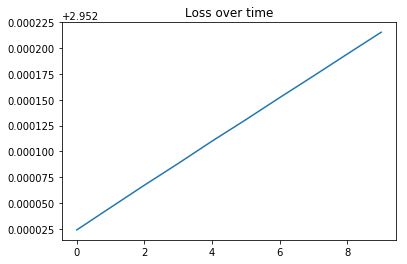

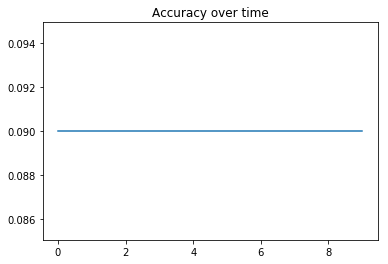

In [235]:
MAX_ITERATIONS = 10

model = np.copy(model_memo)
model, history, accuracy = Adadelta(model, verbose=False)
plt.cla()
plt.title('Loss over time')
plt.plot(history)
plt.show()
plt.title('Accuracy over time')
plt.plot(accuracy)
plt.show()

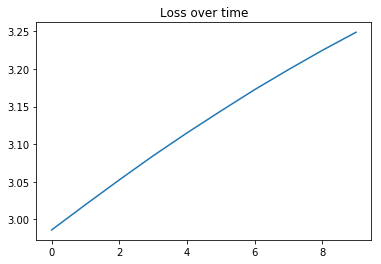

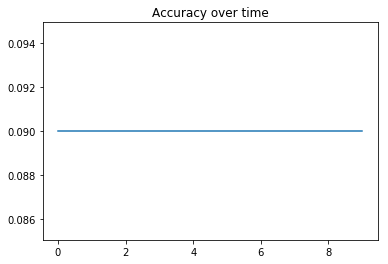

In [236]:
model = np.copy(model_memo)
model, history, accuracy = Adam(model, alpha=2e-3, verbose=False)
plt.cla()
plt.title('Loss over time')
plt.plot(history)
plt.show()
plt.title('Accuracy over time')
plt.plot(accuracy)
plt.show()

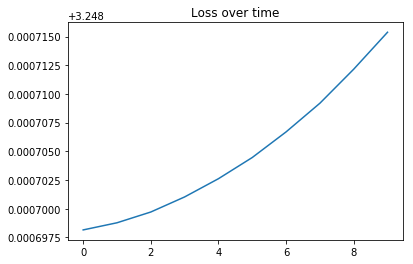

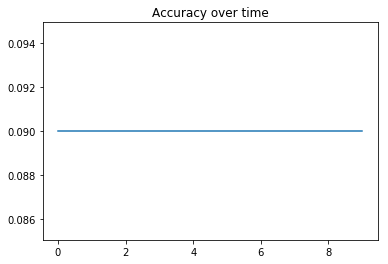

In [237]:
model = np.copy(model_memo)
model, history, accuracy = AdamWithWarmup(model, alpha=2e-5, verbose=False)
plt.cla()
plt.title('Loss over time')
plt.plot(history)
plt.show()
plt.title('Accuracy over time')
plt.plot(accuracy)
plt.show()